<a href="https://colab.research.google.com/github/SalikFillah/Sertifikasi_BNSP/blob/main/Tugas_Praktik_Demonstrasi_ADS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Module

In [1]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt, seaborn as sns

# Import Data

#### Deskripsi Data :
Cardiovascular desease (CVD) atau penyakit kardiovaskuler merupakan salah satu penyebab kematian nomor satu secara global. Diestimasikan telah merenggut nyawa sekitar 18 juta jiwa setiap tahunnya atau 31% dari seluruh penyebab kematian secara global. Empat dari lima kematian CVD diakibatkan oleh serangan jantung dan stroke, dan sepertiganya dialami secara prematur oleh sesorang dengan usia di bawah 70 tahun.

Kegagalan jantung merupakan salah salah penyebab umum dari penyakit kardiovaskuler. Sebagai seorang associate data scientist, Anda ditugaskan untuk melakukan prediksi terhadap kemungkinan terjadinya penyakit jantung. Diharapkan pemodelan yang dihasilkan dapat membantu kinerja dokter dalam mendeteksi pasien dengan penyakit jantung, sehingga dapat menolong lebih banyak orang yang berisiko tinggi terkena penyakit kardiovaskuler.


In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/arubhasy/dataset/main/heart.csv', low_memory=False)
print(df.shape)
df.head(5)

(918, 12)


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,NaN,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49.0,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37.0,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48.0,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54.0,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


#### Keterangan Variabel :
- Age: Usia pasien (tahun)
- Sex: Jenis kelamin pasien (M: Laki-laki, F: Perempuan)
- ChestPainType: Jenis nyeri dada (TA: Angina Tipikal, ATA: Angina Atipikal, NAP: Nyeri Non-Anginal, ASY: Asimtomatik)
- RestingBP: Tekanan darah istirahat (mm Hg)
- Cholesterol: Kolesterol serum (mm/dl)
- FastingBS: Gula darah puasa (1: jika FastingBS > 120 mg/dl, 0: sebaliknya)
- RestingECG: Denyut jantung maksimal istirahat (Normal: Normal, ST: memiliki abnormalitas gelombang ST-T (inversi gelombang T dan/atau elevasi atau depresi ST > 0,05 mV), LVH: menunjukkan hipertrofi ventrikel kiri yang mungkin atau pasti menurut kriteria Estes)
- MaxHR: Denyut jantung maksimal yang dicapai (Nilai numerik antara 60 dan 202)
- Oldpeak: Depresi ST (Nilai numerik diukur dalam depresi)
- ST_Slope: Kemiringan segmen ST puncak latihan maksimal (Up: menanjak, Flat: datar, Down: menurun)
- **HartDisease**: Kelas output (1: penyakit jantung, 0: Normal)

NB : informasi variabel "ExerciseAngina" tidak ada, sehingga saya berasumsi bahwa variabel tersebut mengukur apakah pasien mengalami angina atau tidak (N: No, Y: Yes)


# EDA atau Penelaahan Data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             911 non-null    float64
 1   Sex             908 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 86.2+ KB


## Tipe dan Relasi Data

In [4]:
# memisah data berdasarkan tipe data
df_kategori = df.select_dtypes(include = ['object'])
df_numerik = df.select_dtypes(include = ['float64', 'int64'])

print('varibel kategorik :', set(df_kategori.columns))
print('varibel numerik :', set(df_numerik.columns))

varibel kategorik : {'ExerciseAngina', 'ChestPainType', 'ST_Slope', 'RestingECG', 'Sex'}
varibel numerik : {'Cholesterol', 'RestingBP', 'HeartDisease', 'MaxHR', 'Oldpeak', 'Age', 'FastingBS'}


In [5]:
# ubah tipe object menjadi category untuk mempermudah pembuatan visualisasi
for col in df_kategori.columns:
  df[col] = df[col].astype('category')

## Karakteristik Data

### Statistika Deskriptif
deskripsi statistik dasar dari masing-masing variabel numerik maupun kategorik

In [6]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,911.0,NaN,NaN,NaN,54.102086,12.988393,0.0,47.0,54.0,60.0,177.0
Sex,908,2,M,717,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ChestPainType,918,4,ASY,496,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RestingBP,918.0,NaN,NaN,NaN,132.396514,18.514154,0.0,120.0,130.0,140.0,200.0
Cholesterol,918.0,NaN,NaN,NaN,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,NaN,NaN,NaN,0.233115,0.423046,0.0,0.0,0.0,0.0,1.0
RestingECG,918,3,Normal,552,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MaxHR,918.0,NaN,NaN,NaN,136.809368,25.460334,60.0,120.0,138.0,156.0,202.0
ExerciseAngina,918,2,N,547,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Oldpeak,918.0,NaN,NaN,NaN,0.887364,1.06657,-2.6,0.0,0.6,1.5,6.2


- nilai minimum kolesterol dan restingbp nol
- nilai minimum umur nol
- nilai minimum oldpeak -2.6

In [7]:
# mengubah umur 0 menjadi Nan
df['Age'] = df['Age'].replace({0: np.nan})
# mengimputasi nilai nol dalam kolesterol dengan rata-rata
df['Cholesterol'] = df['Cholesterol'].replace(0, df['Cholesterol'].mean())
# mengimputasi nilai nol dalam restingBP dengan rata-rata
df['RestingBP'] = df['RestingBP'].replace(0, df['RestingBP'].mean())
# mengubah nilai minus Oldpeak menjadi nilai absolut
df['Oldpeak'] = df['Oldpeak'].apply(lambda x: abs(x) if x < 0 else x)

### Menangani Noise

In [8]:
# memeriksa noise pada data variabel kategorik
for col in df_kategori.columns:
  print(col, ' :', set(df[col].unique()))

Sex  : {'M', nan, 'F'}
ChestPainType  : {'ASY', 'TA', 'ATA', 'NAP'}
RestingECG  : {'Normal', 'ST', 'LVH'}
ExerciseAngina  : {'N', 'Y'}
ST_Slope  : {'Flat', 'Down', 'Up'}


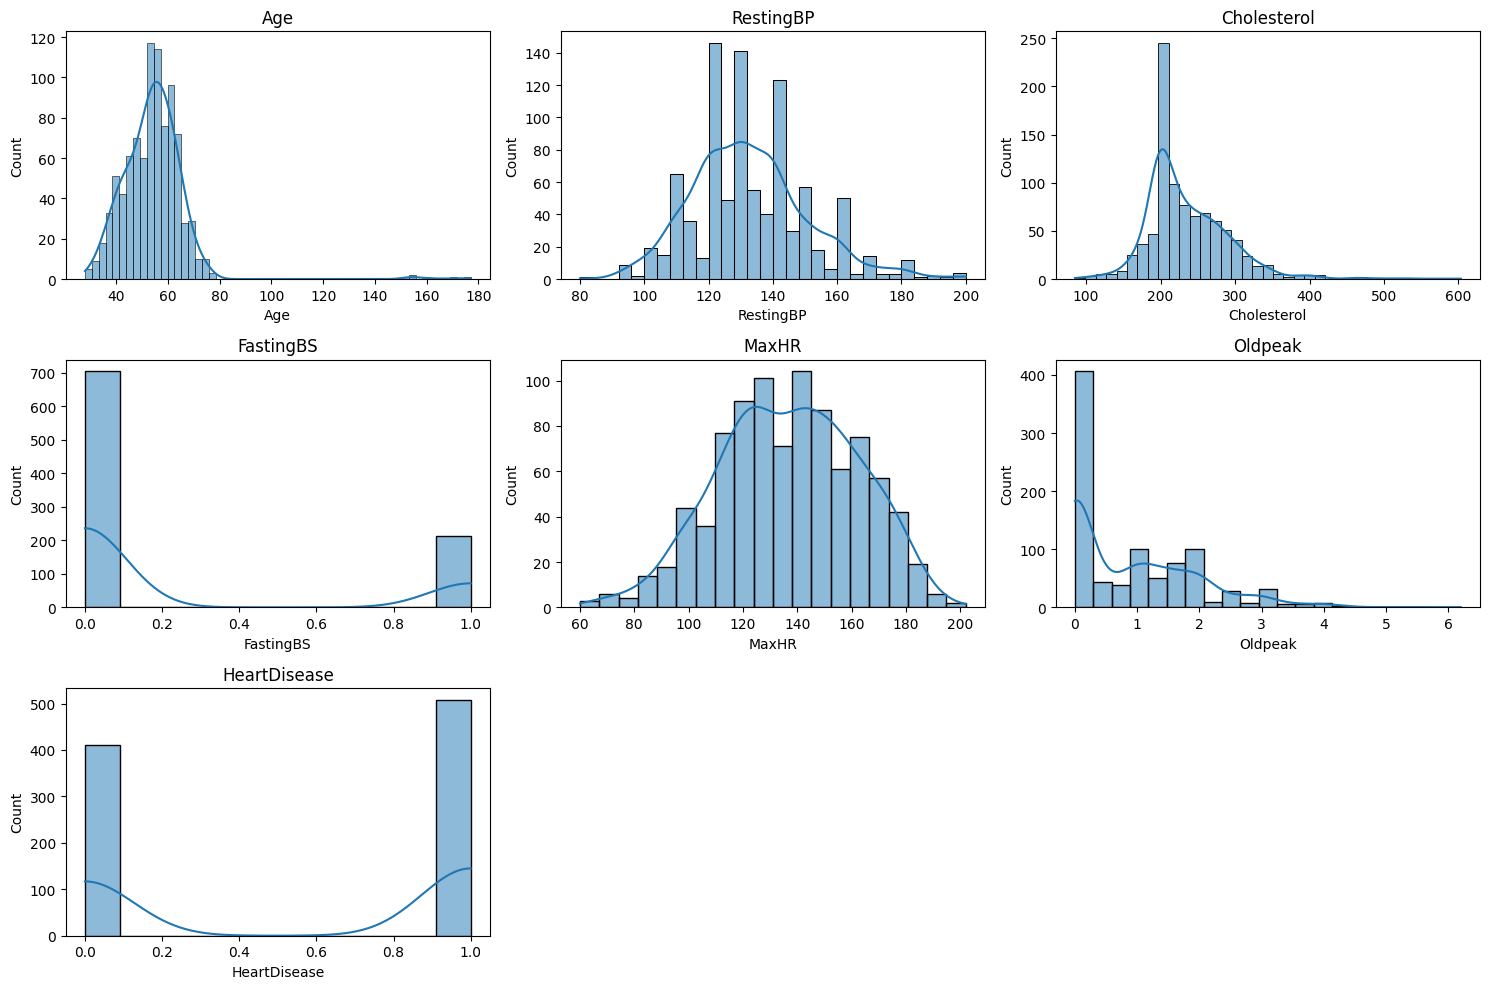

In [9]:
# memeriksa noise pada data variabel numerik menggunakan histogram
plt.figure(figsize=(15, 10))

for col in df_numerik.columns:
  plt.subplot(3, 3, df_numerik.columns.get_loc(col) + 1)
  sns.histplot(data=df, x=col, kde=True)
  plt.title(col)

plt.tight_layout()
plt.show()

- terdapat noise pada variabel "Age"
- terdapat noise pada variabel "Oldpeak", yaitu adanya nilai minus dan outlier yang jauh dari rata-rata

In [10]:
# mengubah umur yang lebih dari 100 menjadi Nan
df['Age'] = df['Age'].apply(lambda x: np.nan if x > 100 else x)

In [11]:
# nilai unik masing-masing variabel numerik
df_numerik.nunique()

Age              57
RestingBP        67
Cholesterol     222
FastingBS         2
MaxHR           119
Oldpeak          53
HeartDisease      2
dtype: int64

ada beberapa variabel numerik yang memiliki jumlah nilai unik sangat rendah (perlu dipertimbangkan)

### Menangani Duplikasi

In [12]:
print('jumlah duplikat data :', df.duplicated().sum())

jumlah duplikat data : 0


### Menangani Outlier

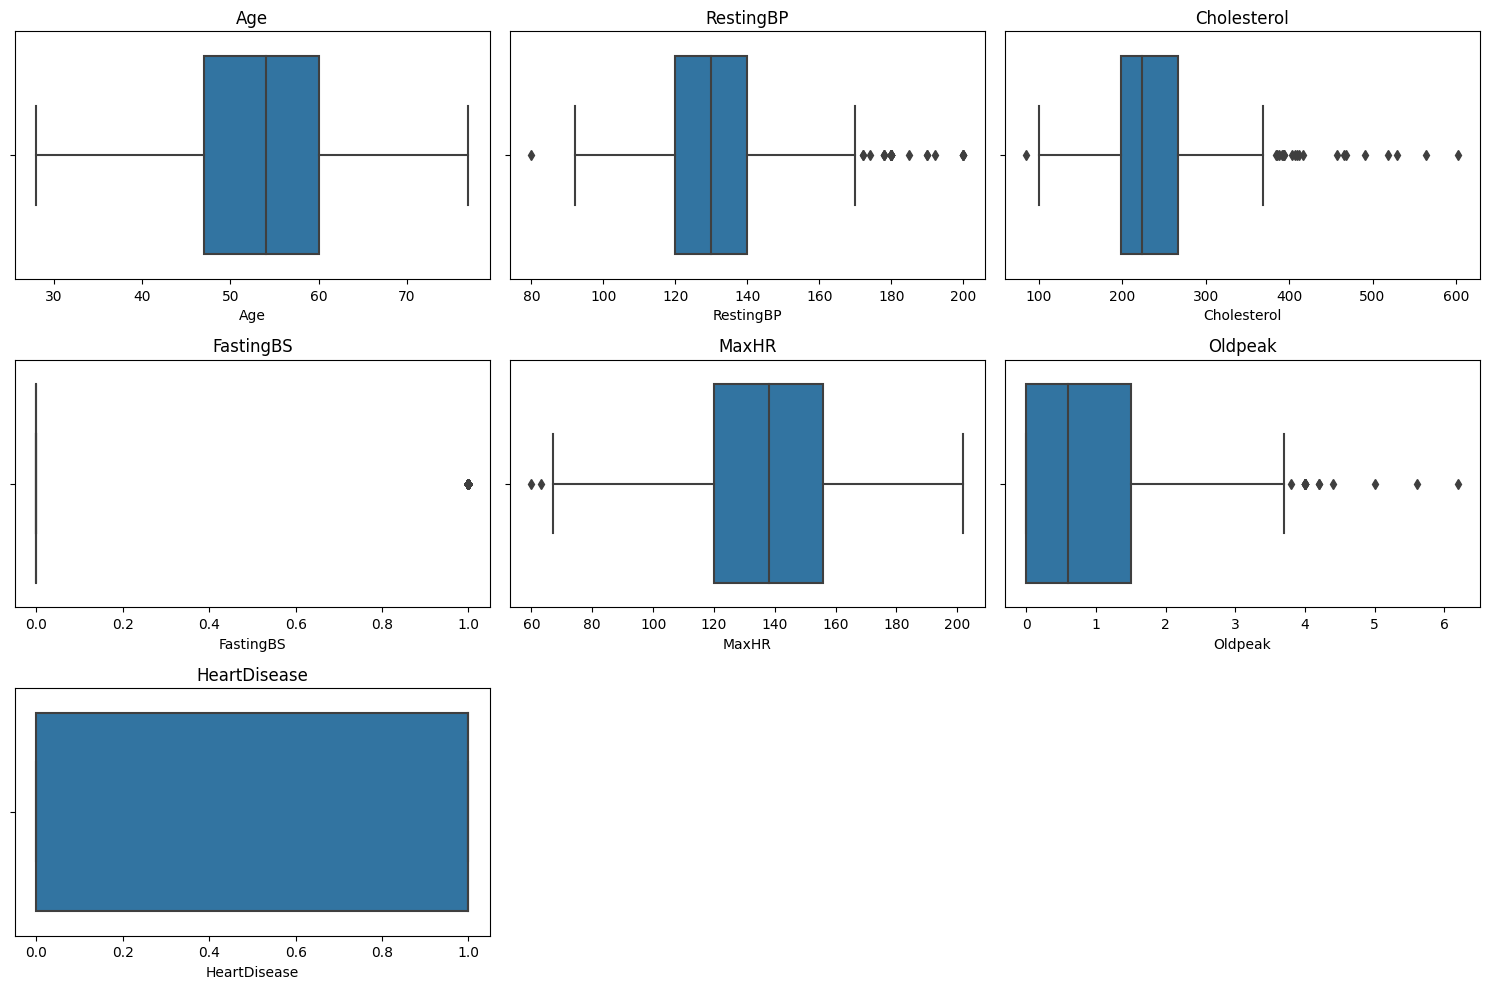

In [13]:
# identifikasi outlier pada data variabe numerik menggunakan boxplot
plt.figure(figsize=(15, 10))

for col in df_numerik.columns:
  plt.subplot(3, 3, df_numerik.columns.get_loc(col) + 1)
  sns.boxplot(data=df, x=col)
  plt.title(col)

plt.tight_layout()
plt.show()

- kolesterol dan oldpeak memiliki nilai outlier

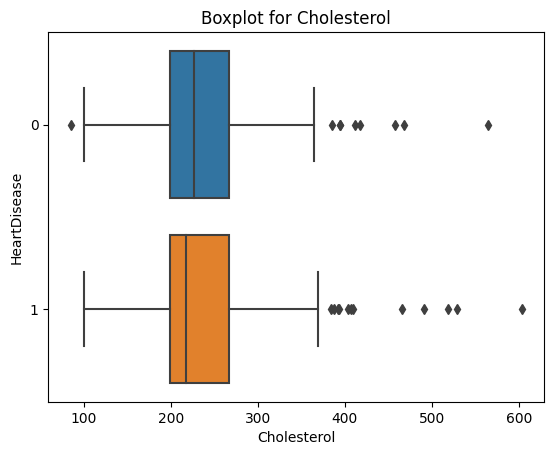

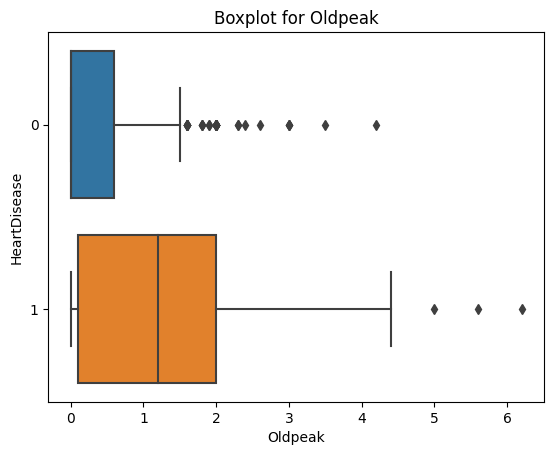

In [14]:
# ubah variabel target ke dalam tipe objek
df['HeartDisease'] = df['HeartDisease'].astype('category')

# menampilkan hubungan diantara variabel "Cholesterol" dan "Oldpeak" dengan "HeartDisease" melalui boxplot
columns_to_plot = ["Cholesterol", "Oldpeak"]

for col in columns_to_plot:
    sns.boxplot(x=col, y="HeartDisease", data=df)
    plt.title(f'Boxplot for {col}')
    plt.show()

Q1=198.7995642701525, Q3=267.0, IQR=68.2004357298475


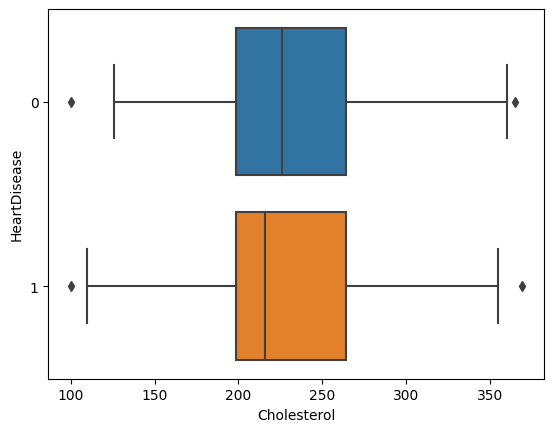

Q1=0.0, Q3=1.5, IQR=1.5


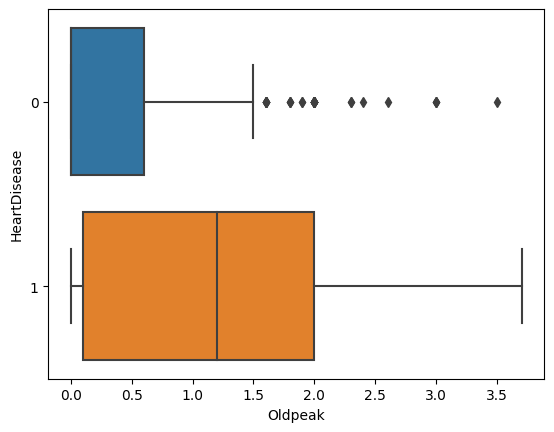

In [15]:
# melakukan filter outlier pada variabel kolesterol dan oldpeak

for col in columns_to_plot:
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1
  print("Q1={}, Q3={}, IQR={}".format(Q1, Q3, IQR))

  df.drop(df[(df[col] < Q1-1.5*IQR) | (df[col] > Q3+1.5*IQR)].index, inplace=True)
  p = sns.boxplot(x=col, y="HeartDisease", data=df)
  plt.show()

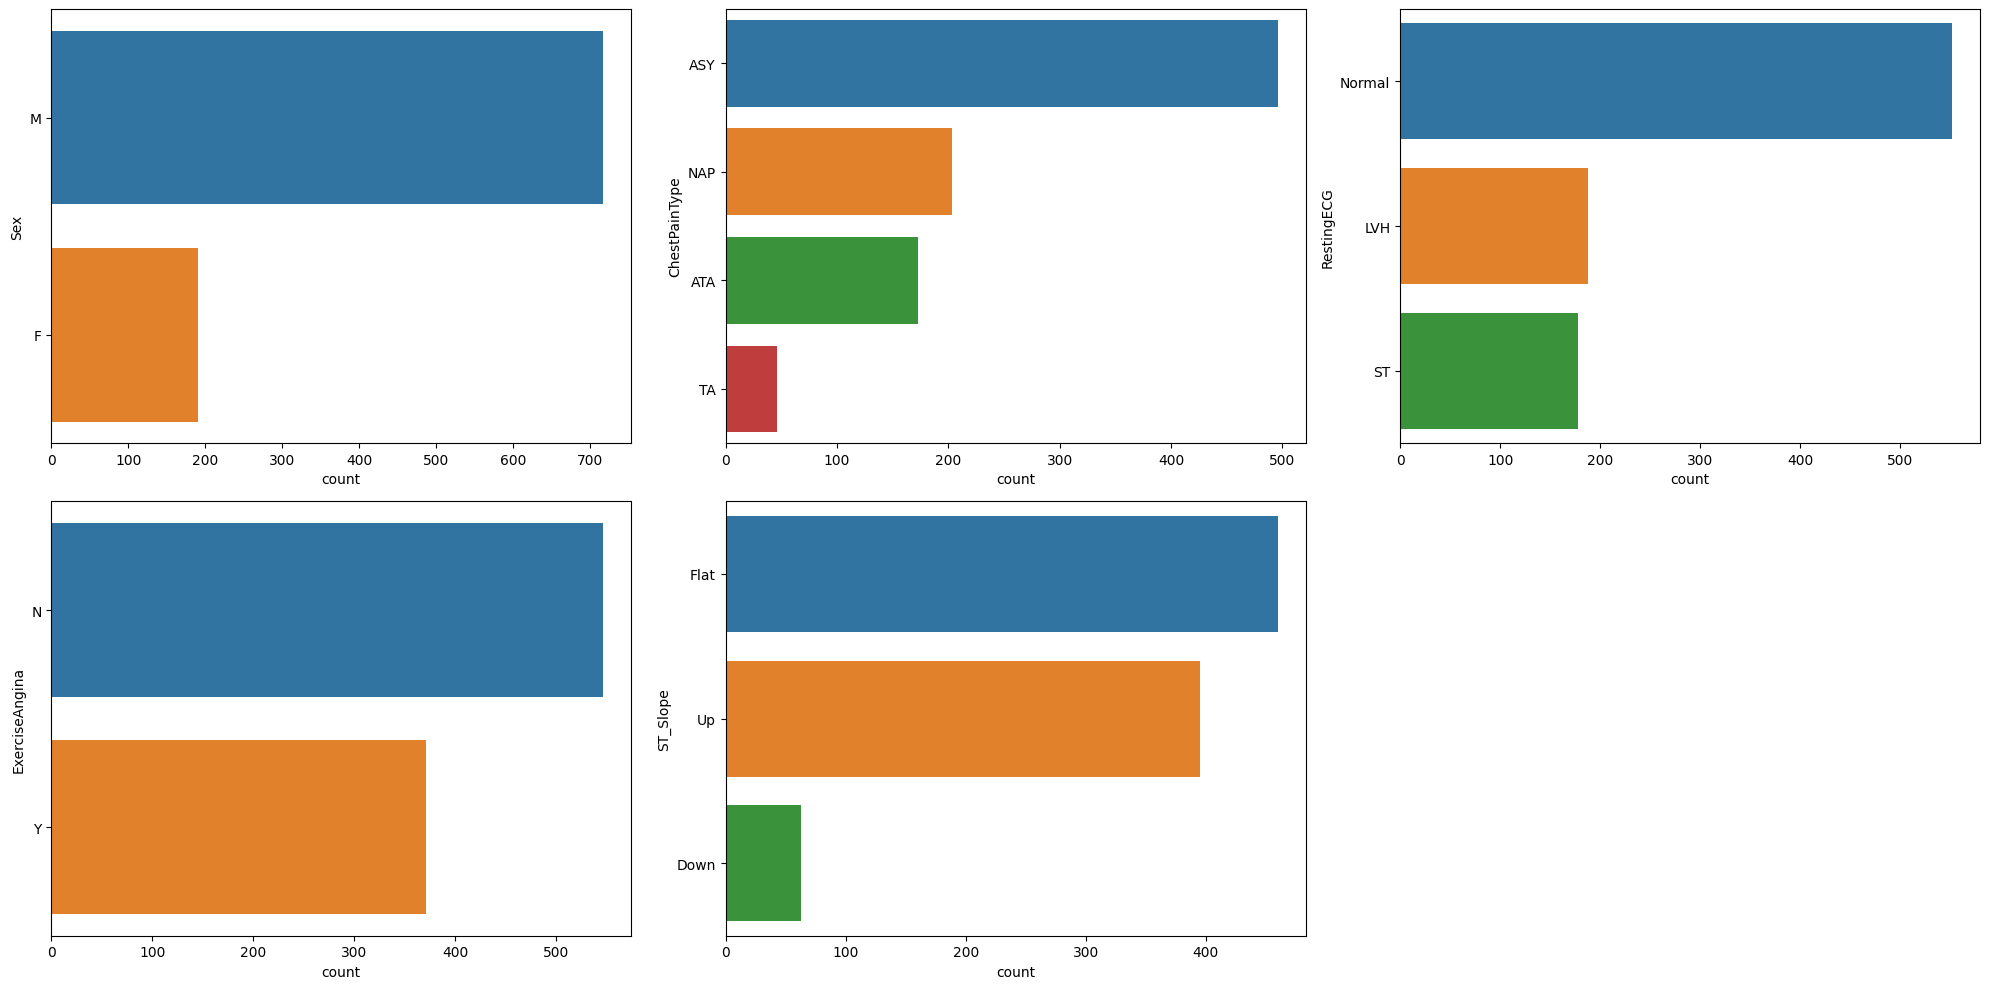

In [16]:
# identifikasi outlier pada data variabe numerik menggunakan barplot
plt.figure(figsize=(20,10))

for col in df_kategori.columns:
  plt.subplot(2, 3, df_kategori.columns.get_loc(col) + 1)
  ax = sns.countplot(data=df_kategori, y=col, order=df_kategori[col].value_counts(ascending=False).index)

plt.tight_layout()
plt.show()

- masih ada beberapa kelas atau kategori minoritas dari masing-masing variabel, sehingga perlu penanganan

In [17]:
# membuat kategori baru pada variabel "ChestPainType"
df['ChestPainType'] = df['ChestPainType'].replace({'TA': 'Angina', 'ATA': 'Angina'})

### Menangani Missing Value

In [18]:
df.isnull().sum()

Age               13
Sex               10
ChestPainType      0
RestingBP          0
Cholesterol        0
FastingBS          0
RestingECG         0
MaxHR              0
ExerciseAngina     0
Oldpeak            0
ST_Slope           0
HeartDisease       0
dtype: int64

- karena kita tidak bisa menentukan jenis kelamin pasien tanpa informasi tambahan, maka lebih baik **menghapus** setiap observasi atau baris yang nilai pada kolom "Sex" nya Nan
- untuk "Age", masih memungkinkan untuk diimputasi dengan nilai tertentu

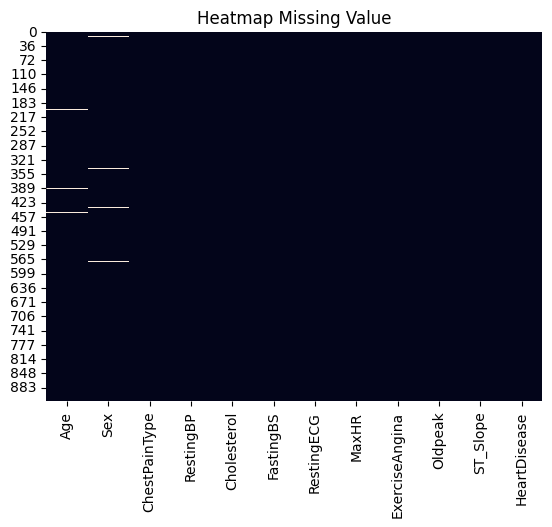

In [19]:
# visualisasi menggunakan heatmap untuk mengetahui pola nilai yang missing
sns.heatmap(df.isnull(), cbar=False)
plt.title('Heatmap Missing Value')
plt.show()

setelah melihat visualisasi diatas, ternyata diketahui bahwa sebagian besar missing value pada variabel "Age" ada pada setiap observasi pada variabel "Sex" juga (pertimbangan diatas dibatalkan).

In [20]:
# menghapus atau membuang missing value
df = df.dropna()
print(df.shape)

(861, 12)


# Memvalidasi Data

In [21]:
# mengubah variabel Age menjadi integer
df['Age'] = df['Age'].astype('int')
# mengubah beberapa variabel numerik yang memiliki nilai unik rendah menjadi kategorik
df['FastingBS'] = df['FastingBS'].astype('category')
df['HeartDisease'] = df['HeartDisease'].astype('category')

<ipython-input-21-3914ae3c0a70>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'] = df['Age'].astype('int')
<ipython-input-21-3914ae3c0a70>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['FastingBS'] = df['FastingBS'].astype('category')
<ipython-input-21-3914ae3c0a70>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

## Laporan Validasi dan Kualitas Data
source : visual pyhton

                                             |          | [  0%]   00:00 -> (? left)


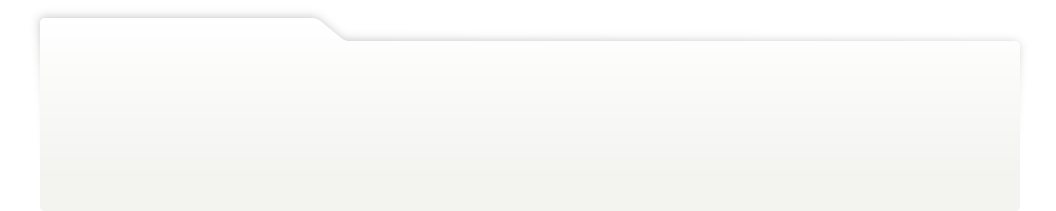
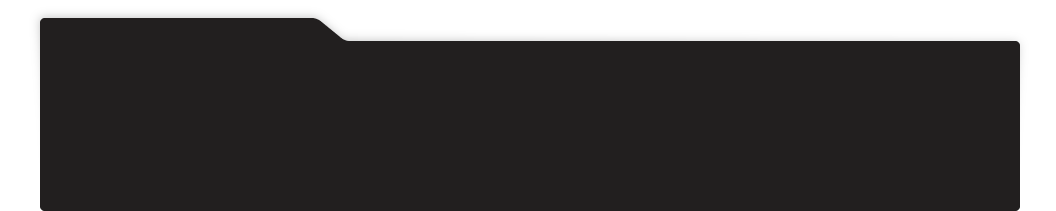
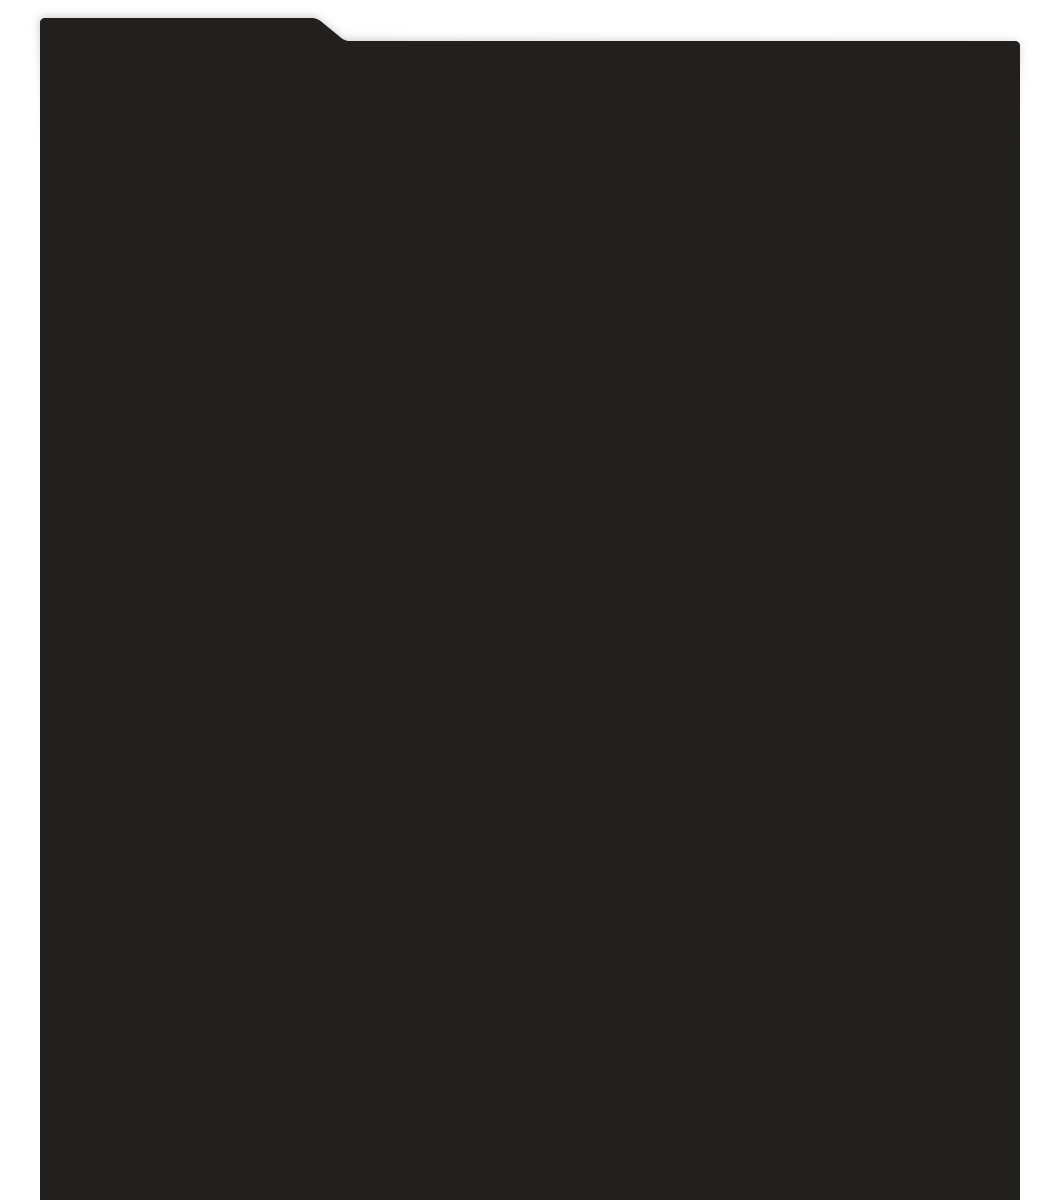
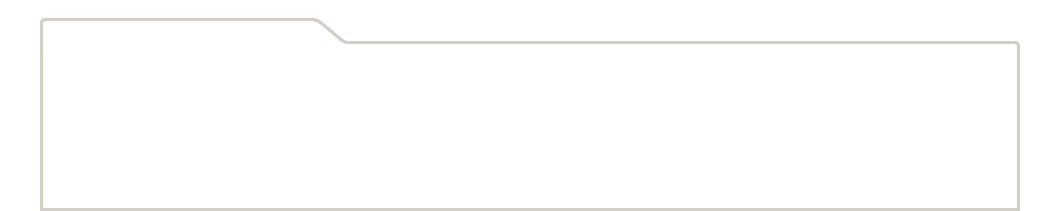
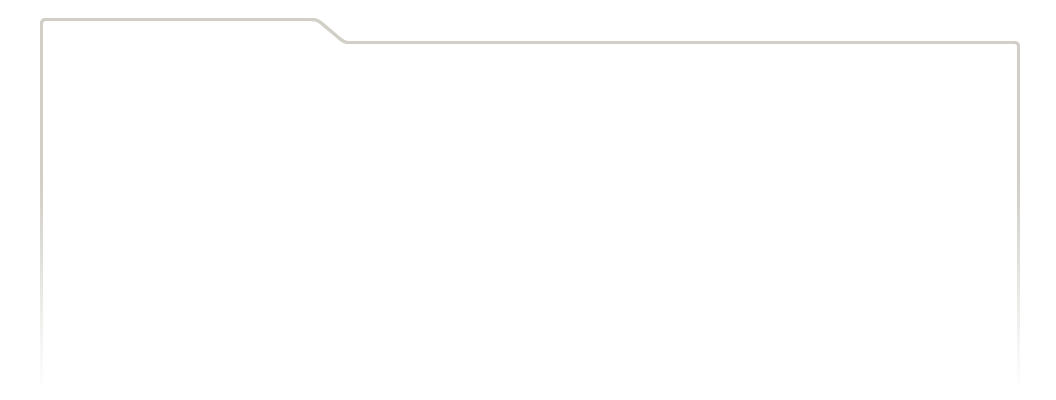
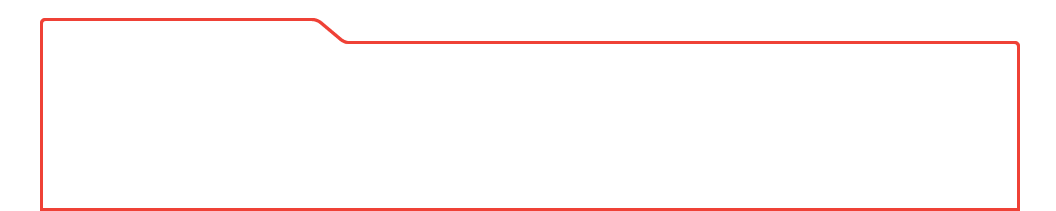
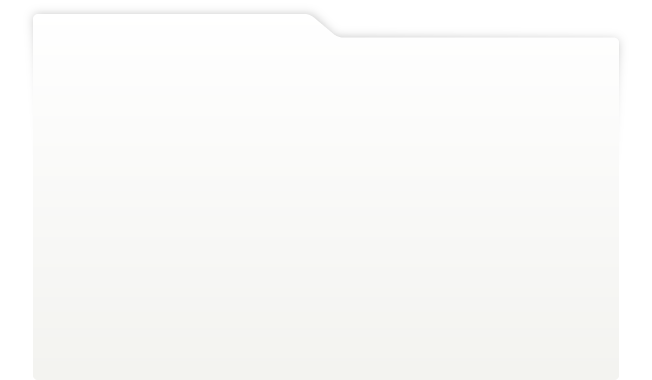
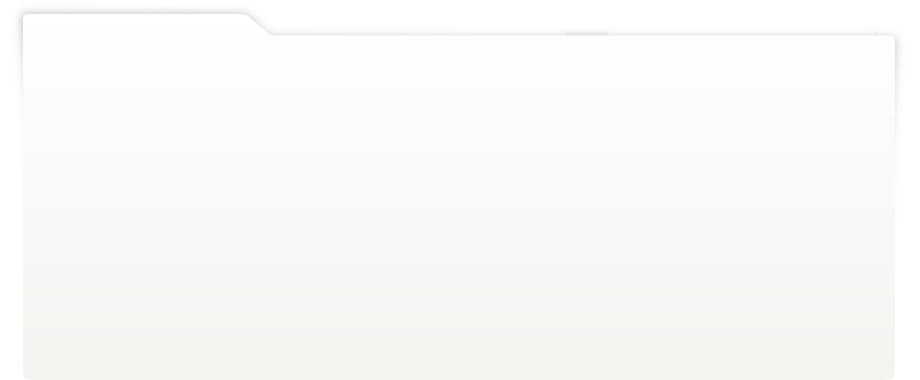
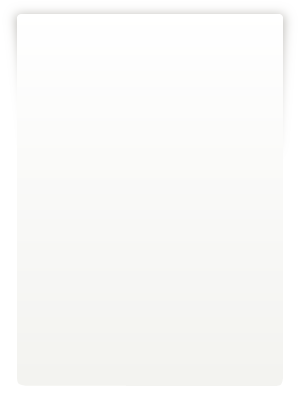
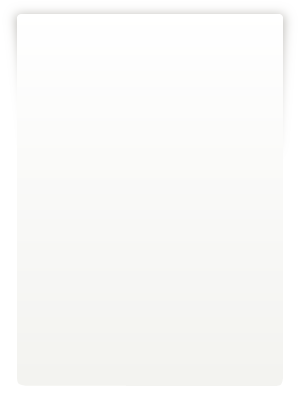
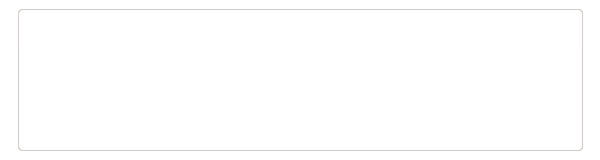
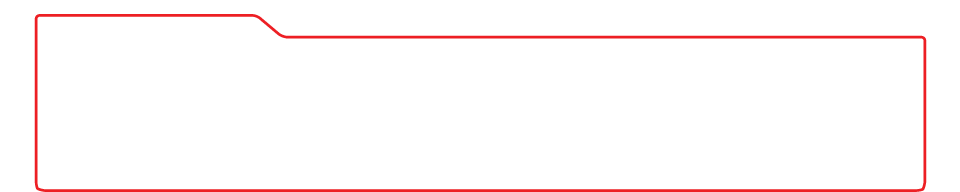
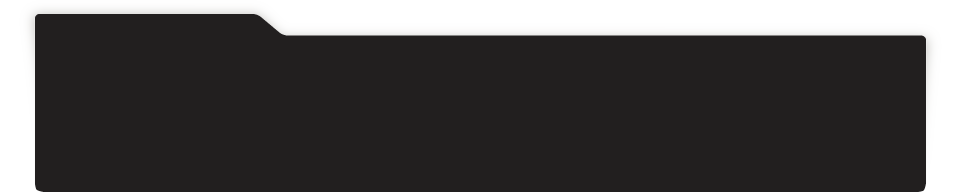
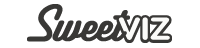
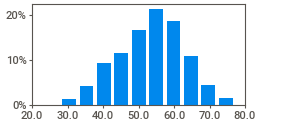
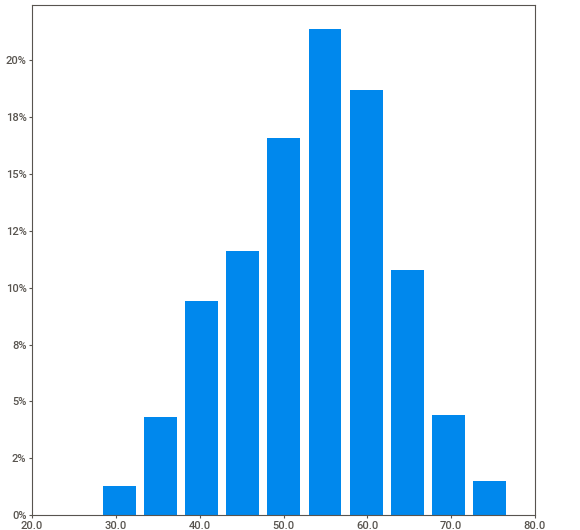
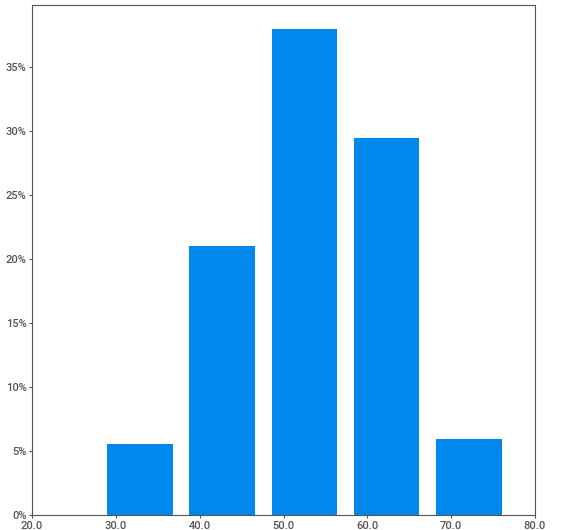
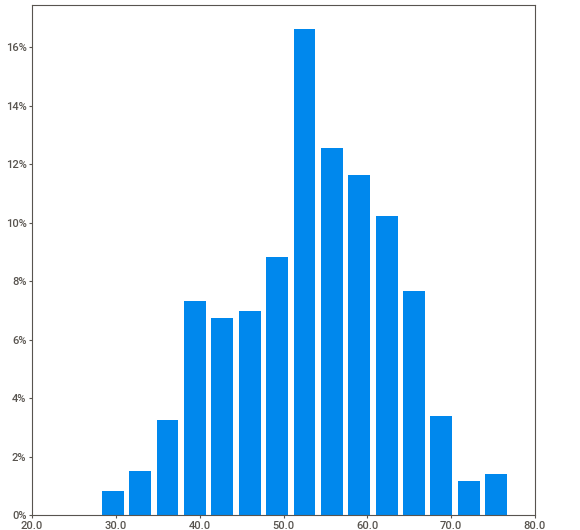
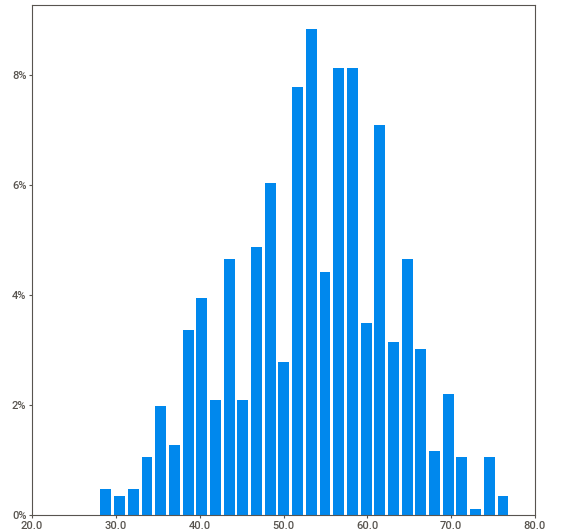
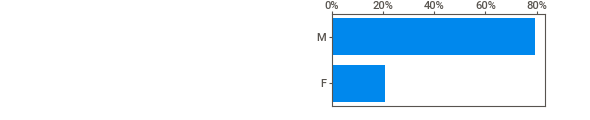
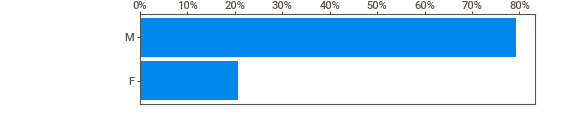
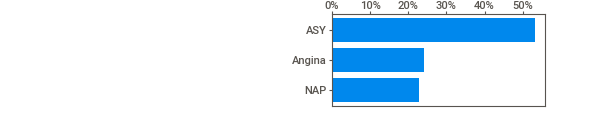
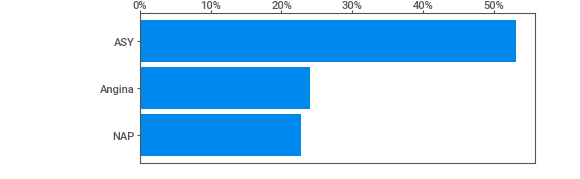
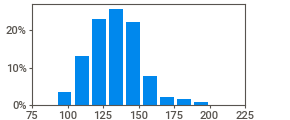
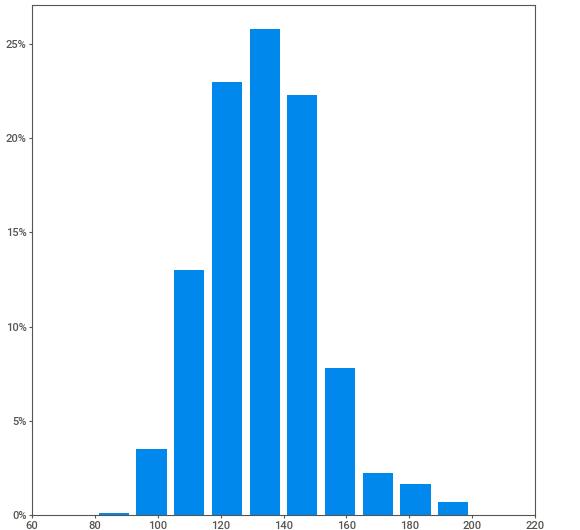
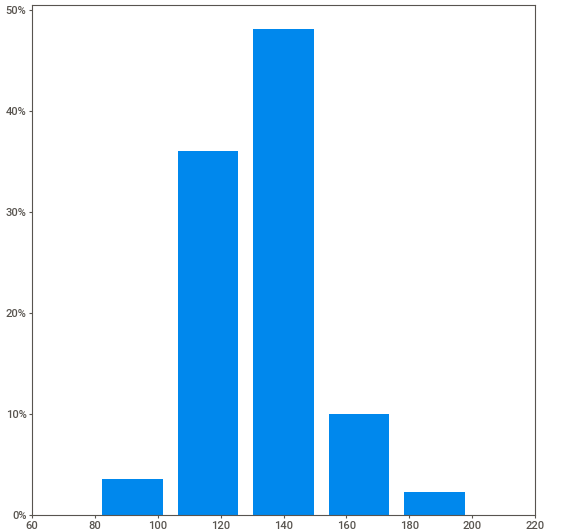
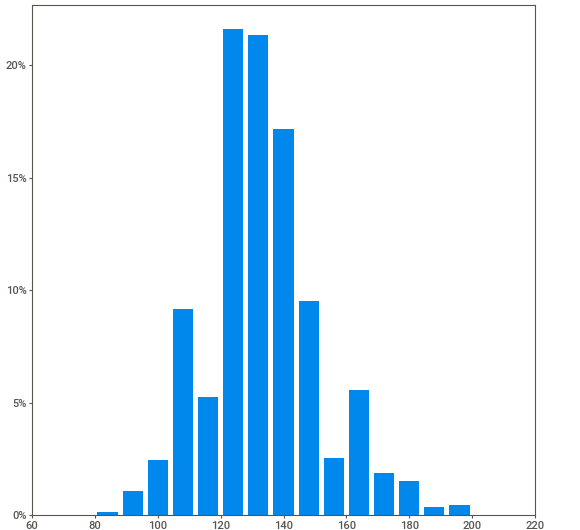
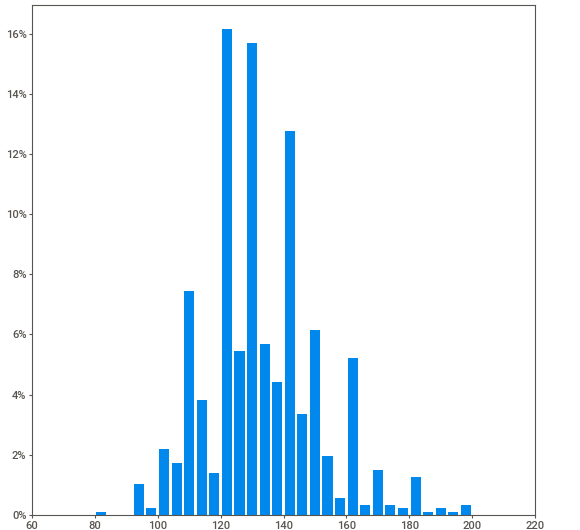
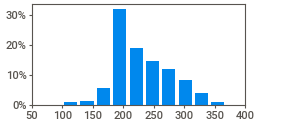
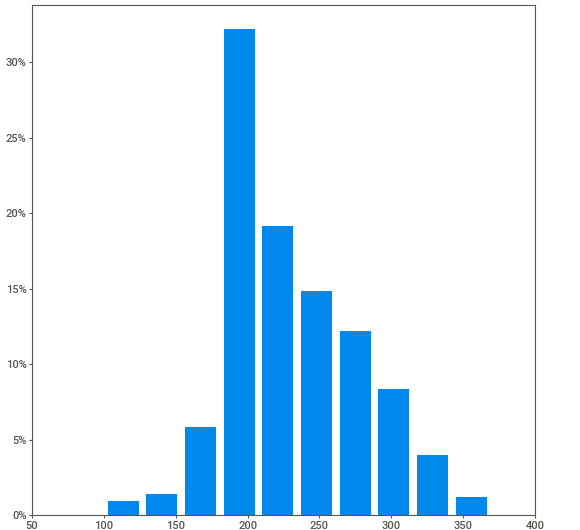
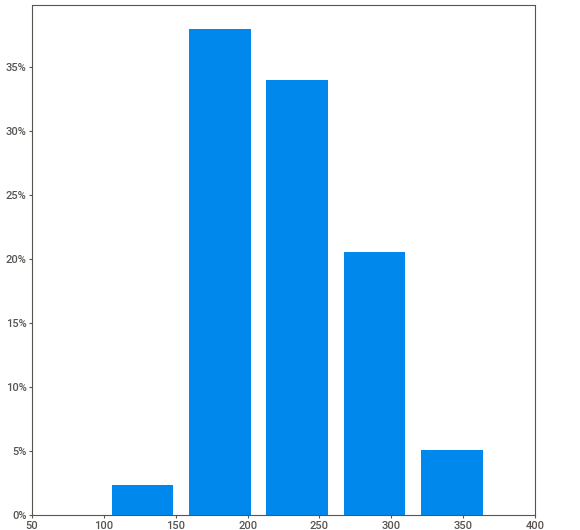
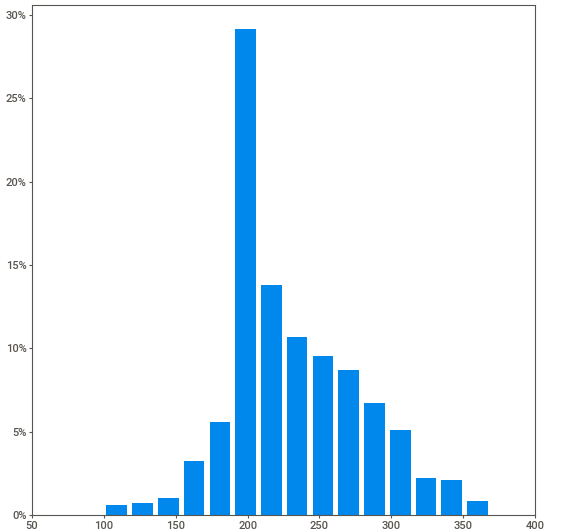
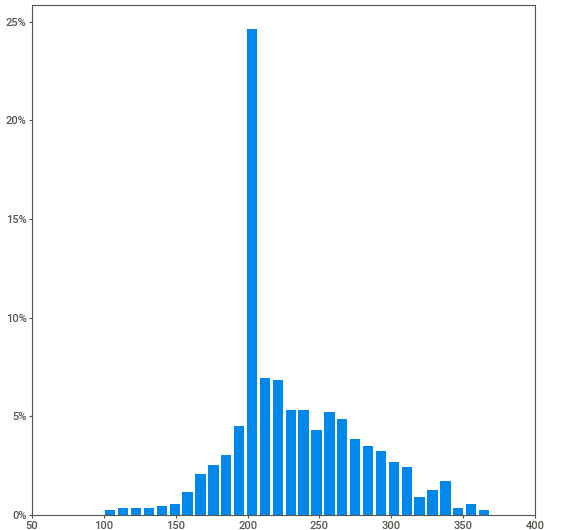
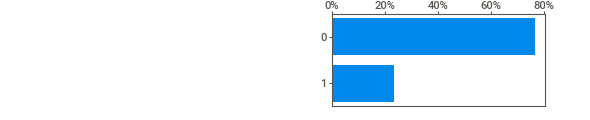
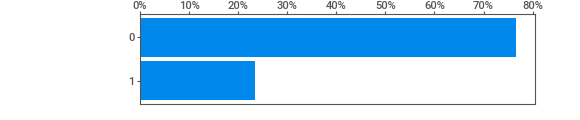
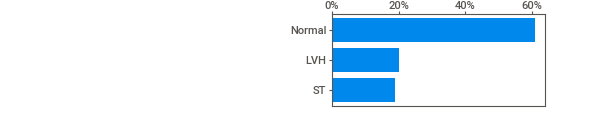
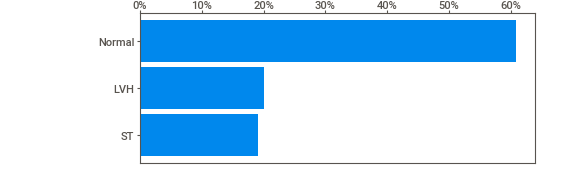
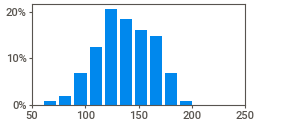
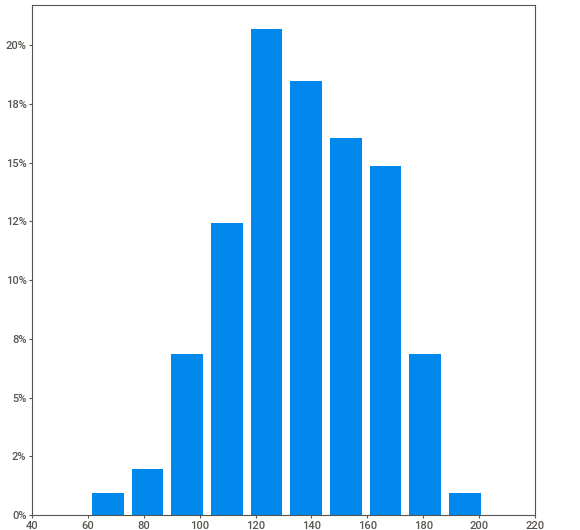
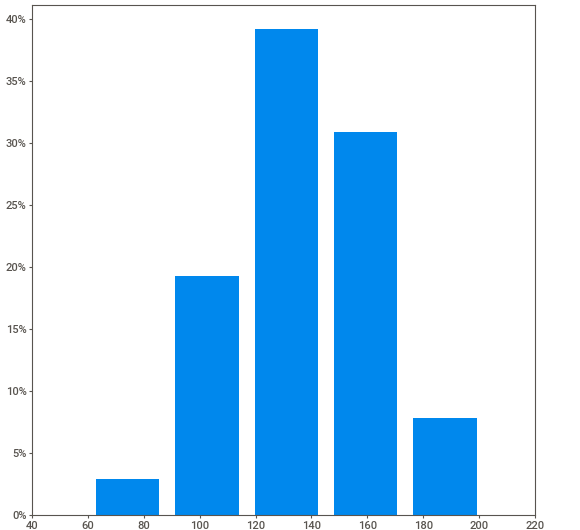
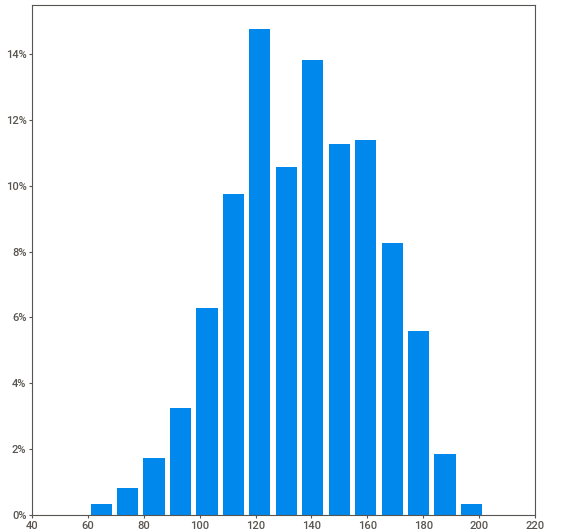
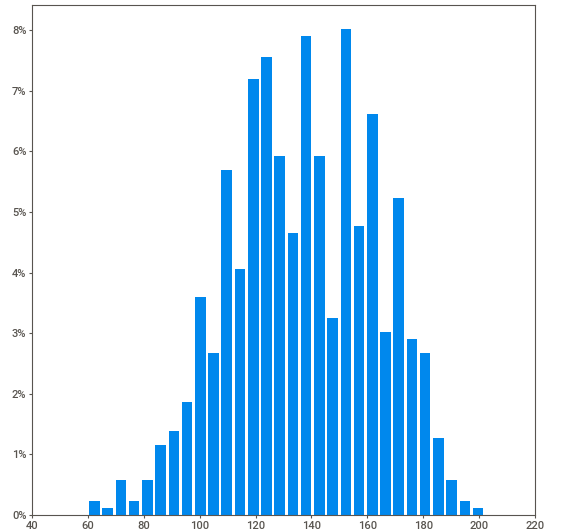
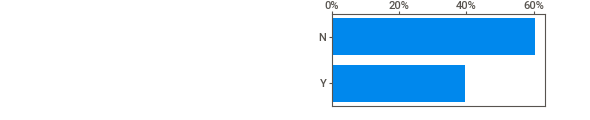
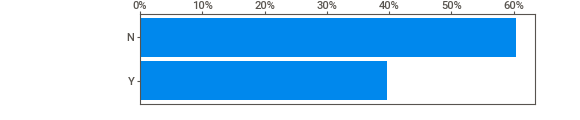
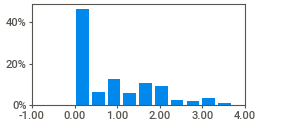
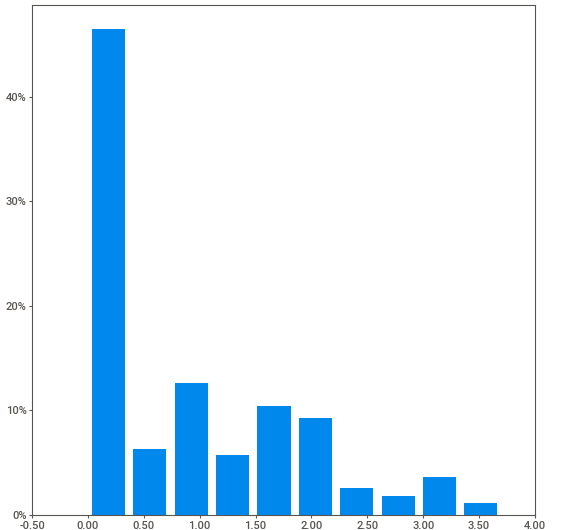
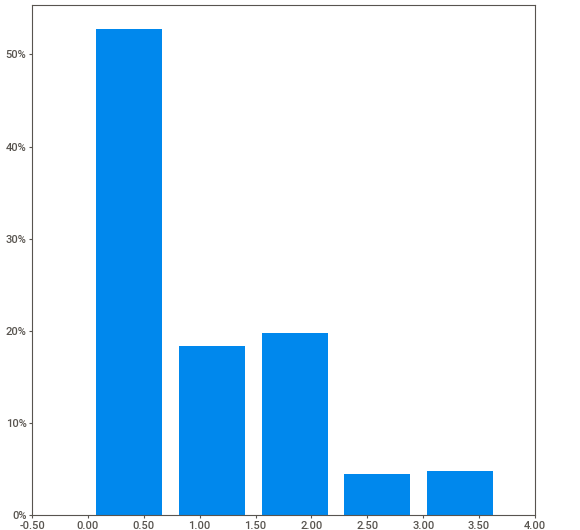
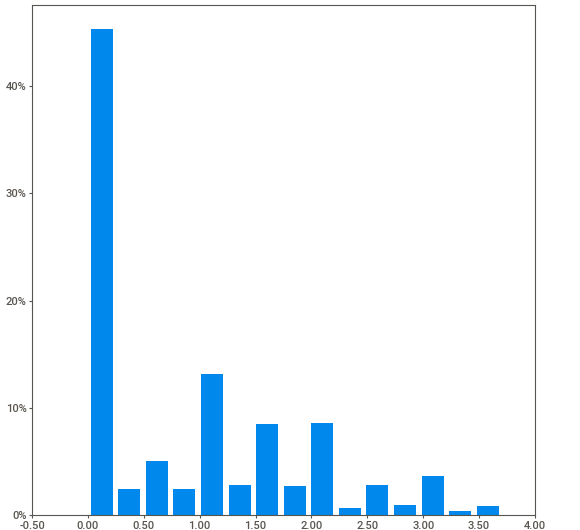
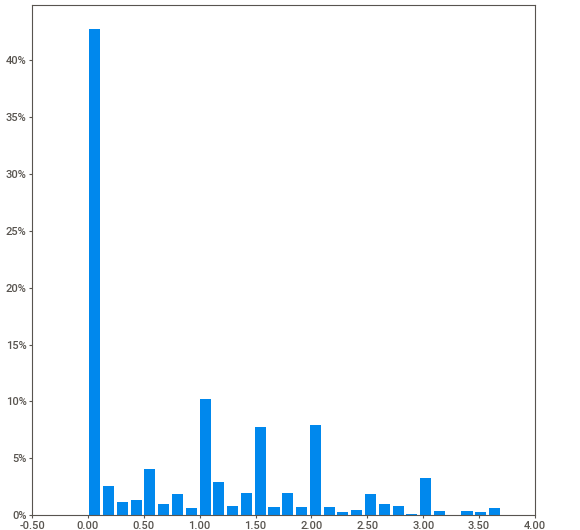
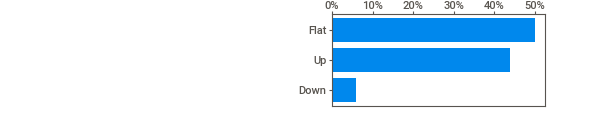
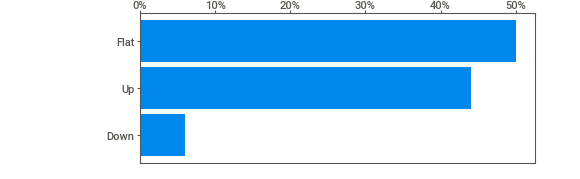
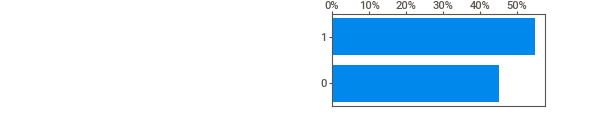
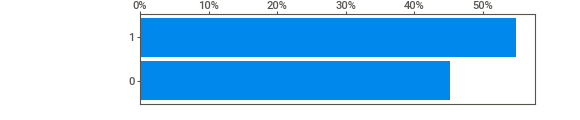
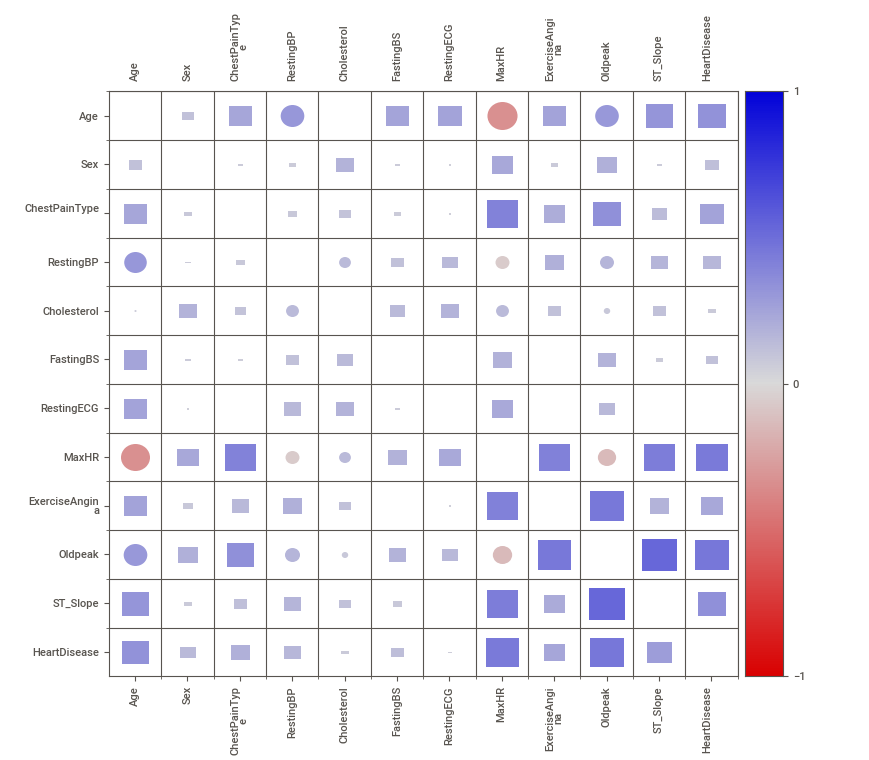
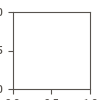

In [22]:
import sweetviz

report = sweetviz.analyze([df, 'Reporrt'])
report.show_notebook()
report

# EDA (Analisis Data Eksplorasi)
EDA yang dimaksud disini ialah mengumpulkan informasi dan insight yang berharga dari masing-masing variabel pada data mau itu numerik atau kategorik. sayangnya, EDA seperti ini tidak sempat dibahas lebih detail pada saat pelatihan dan saya rasa untuk melakukan tahap ini, hanya perlu domain knowledge saja. anda bisa memanfaatkan **visual python** agar mempermudah pembuatan chart atau grafiknya nanti.

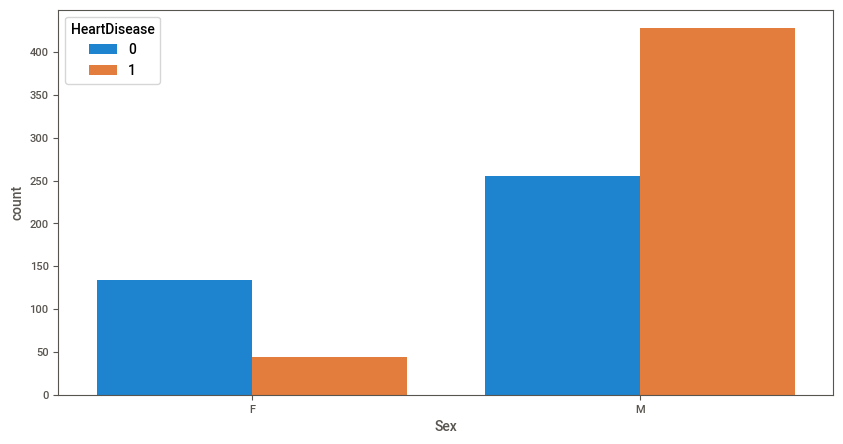

In [23]:
# contohnya....
# Visual Python: Visualization > Seaborn
plt.figure(figsize=(10,5))

sns.countplot(data=df, x='Sex', hue='HeartDisease')
plt.show()

interpretasi :
- banyak pasien dari kalangan pria yang terkena penyakit jantung

Text(0, 0.5, '% pasien terkena penyakit jantung (atau tidak)')

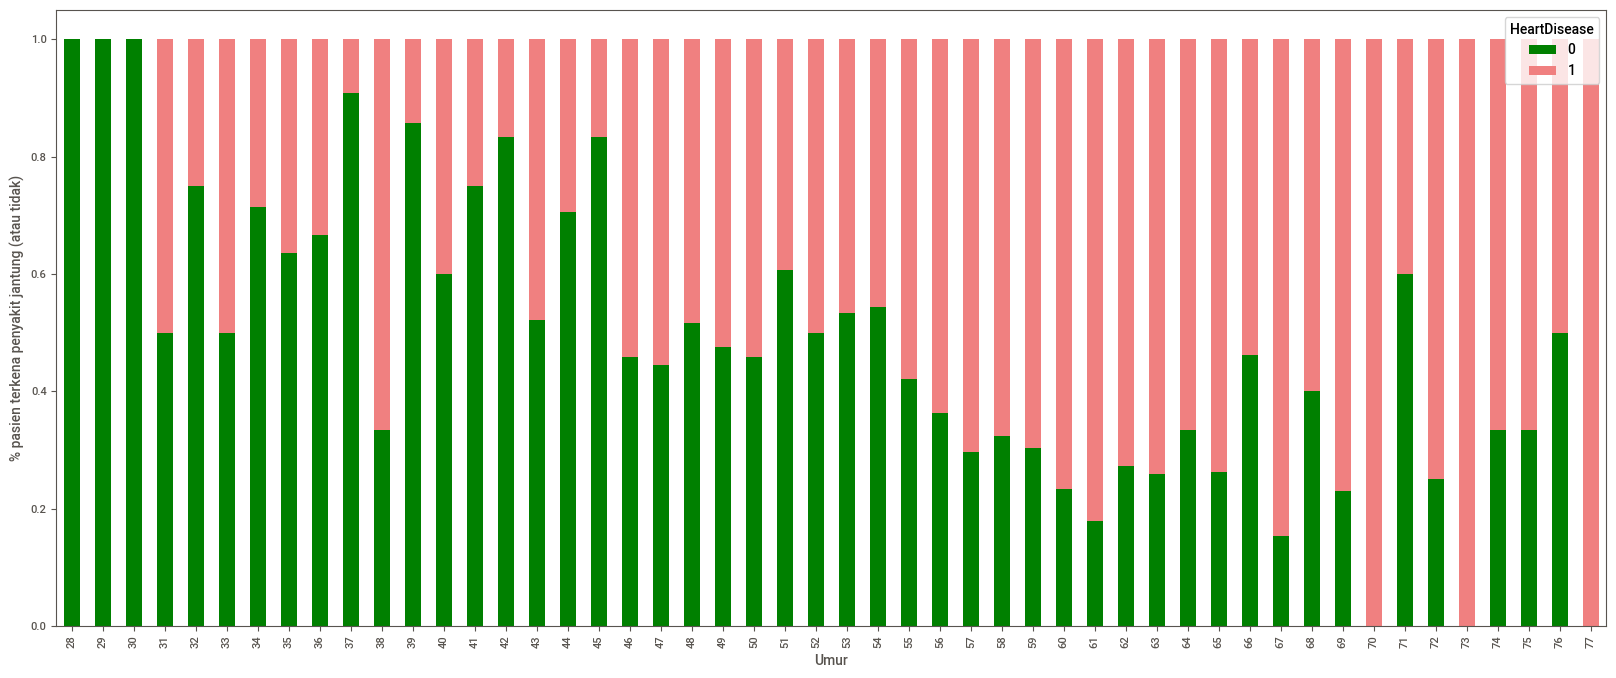

In [24]:
# distribusi umur pasien yang terkena penyakit jantung
y = df.groupby(['Age','HeartDisease'])['HeartDisease'].count().unstack().fillna(0)
y1 = y.div(y.sum(1).astype('float'), axis = 0)
y1.plot(kind = 'bar', stacked = True, figsize = (20, 8), color = ['green', 'lightcoral'])

plt.xlabel('Umur')
plt.ylabel('% pasien terkena penyakit jantung (atau tidak)')

- pasien dengan umur dibawah 70 tahun lebih rentan terkena penyakit jantung

# Kontruksi Data

## Menampilkan Korelasi

In [25]:
# melakukan seleksi fitur dengan melihat korelasi diantara variabel prediktor
df.corr()

<ipython-input-25-9d109b04fd93>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Age,RestingBP,Cholesterol,MaxHR,Oldpeak
Age,1.000000,0.268181,0.010143,-0.387978,0.260013
RestingBP,0.268181,1.000000,0.100101,-0.110242,0.126794
Cholesterol,0.010143,0.100101,1.000000,0.099768,0.037488
MaxHR,-0.387978,-0.110242,0.099768,1.000000,-0.189844
Oldpeak,0.260013,0.126794,0.037488,-0.189844,1.000000


<ipython-input-26-b45782499d29>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


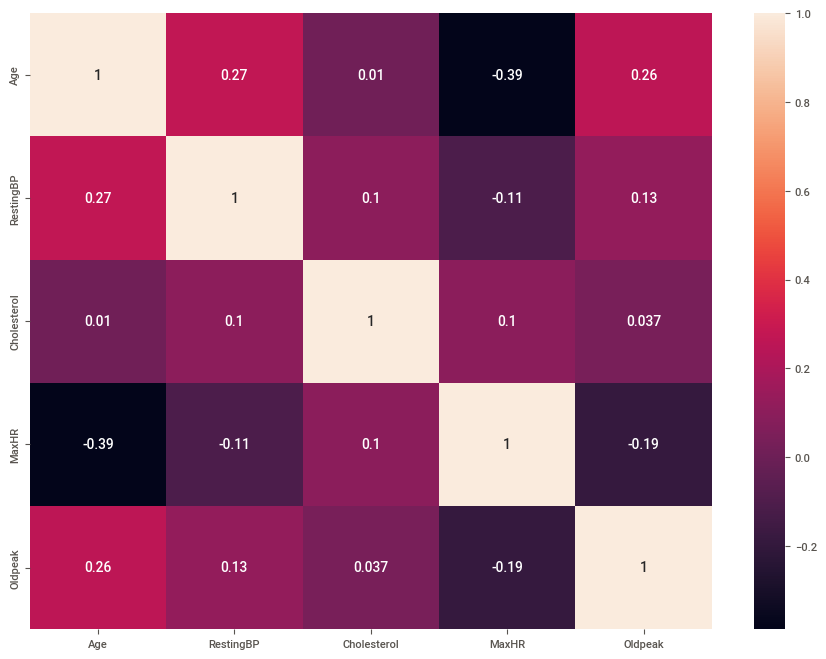

In [26]:
# matriks korelasi
plt.figure(figsize=(11,8))
sns.heatmap(df.corr(), annot=True)
plt.show()

- karena tidak ada korelasi yang cukup besar dari seluruh hubungan variabel numerik yang ada, saya rasa tidak perlu melakukan seleksi fitur

## One Hot Encoding

In [27]:
# transformasi seluruh variabel kategorik
print(df.shape)
for col in df.select_dtypes('category').columns:
  if col != 'HeartDisease':
    transformasi = pd.get_dummies(df[col], prefix='')
    df = pd.concat([df, transformasi], axis = 1)
    # hapus variabel kategorik awal, sudah tidak diperlukan
    try:
      df.drop([col], axis=1, inplace=True)
    except Exception as err_:
      print(err_)

print(df.shape)
df.head()

(861, 12)
(861, 21)


,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,HeartDisease,_F,_M,_ASY,_NAP,...,_0,_1,_LVH,_Normal,_ST,_N,_Y,_Down,_Flat,_Up
1,49,160.0,180.0,156,1.0,1,1,0,0,1,...,1,0,0,1,0,1,0,0,1,0
2,37,130.0,283.0,98,0.0,0,0,1,0,0,...,1,0,0,0,1,1,0,0,0,1
3,48,138.0,214.0,108,1.5,1,1,0,1,0,...,1,0,0,1,0,0,1,0,1,0
4,54,150.0,195.0,122,0.0,0,0,1,0,1,...,1,0,0,1,0,1,0,0,0,1
5,39,120.0,339.0,170,0.0,0,0,1,0,1,...,1,0,0,1,0,1,0,0,0,1


# Membangun Model

In [28]:
import warnings; warnings.simplefilter('ignore')
from sklearn import  tree
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score
sns.set(style="ticks", color_codes=True)

In [29]:
# tampilan data
N, P = df.shape
print('baris = ', N, ', Kolom (jumlah variabel) = ', P)
df.head()

baris =  861 , Kolom (jumlah variabel) =  21


,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,HeartDisease,_F,_M,_ASY,_NAP,...,_0,_1,_LVH,_Normal,_ST,_N,_Y,_Down,_Flat,_Up
1,49,160.0,180.0,156,1.0,1,1,0,0,1,...,1,0,0,1,0,1,0,0,1,0
2,37,130.0,283.0,98,0.0,0,0,1,0,0,...,1,0,0,0,1,1,0,0,0,1
3,48,138.0,214.0,108,1.5,1,1,0,1,0,...,1,0,0,1,0,0,1,0,1,0
4,54,150.0,195.0,122,0.0,0,0,1,0,1,...,1,0,0,1,0,1,0,0,0,1
5,39,120.0,339.0,170,0.0,0,0,1,0,1,...,1,0,0,1,0,1,0,0,0,1


In [30]:
predictor = df.loc[:, ~df.columns.isin(['HeartDisease'])]
target = df['HeartDisease']

xTrain, xTest, yTrain, yTest = train_test_split(predictor, target, test_size=0.3, random_state=100)
print(xTrain.shape, yTrain.shape)
print(xTest.shape, yTest.shape)

(602, 20) (602,)
(259, 20) (259,)


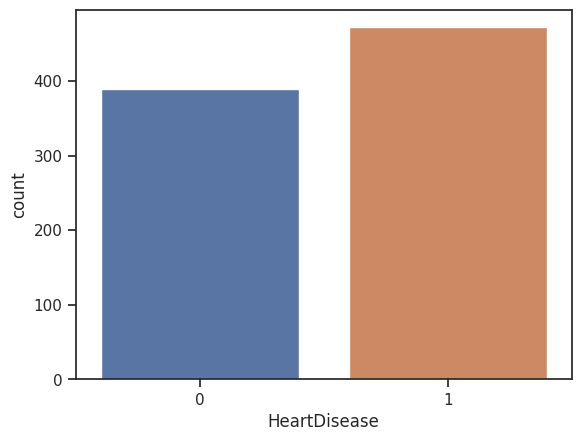

Counter({1: 472, 0: 389})
0 = 54.81997677119628 %  1 = 45.18002322880372 %


In [31]:
# Visual Python: Visualization > Seaborn
from collections import Counter

sns.countplot(data=df, x='HeartDisease')
plt.show()

D = Counter(df['HeartDisease'])
print(D)
print("0 =", D[1]*100/(len(df['HeartDisease'])), '%  1 =',D[0]*100/(len(df['HeartDisease'])) ,'%')

## Regresi Logistik

In [32]:
reglog = LogisticRegression().fit(xTrain, yTrain)
prediksi_regLog = reglog.predict(xTest)
print(confusion_matrix(yTest, prediksi_regLog))
print(classification_report(yTest, prediksi_regLog))

[[105  20]
 [ 13 121]]
              precision    recall  f1-score   support

           0       0.89      0.84      0.86       125
           1       0.86      0.90      0.88       134

    accuracy                           0.87       259
   macro avg       0.87      0.87      0.87       259
weighted avg       0.87      0.87      0.87       259



Text(53.75, 0.5, 'Truth')

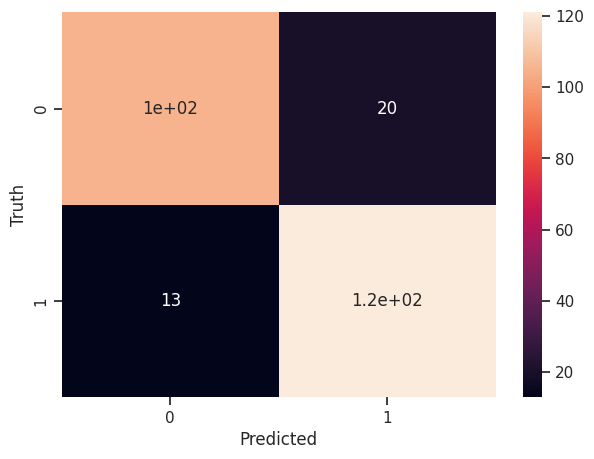

In [33]:
# visualisasi confusion matrix
cm = confusion_matrix(yTest, prediksi_regLog)

plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

### Feature Importance

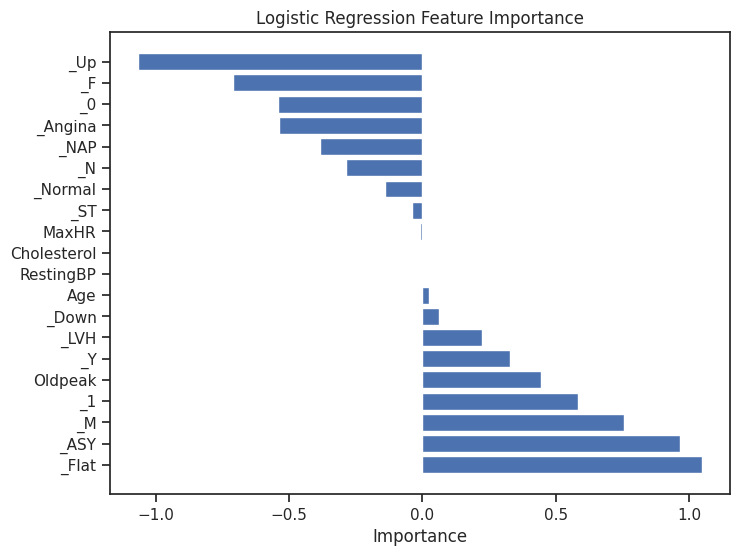

In [61]:
coefficients = reglog.coef_[0]

# dataframe untuk visualisasi
feature_importance_df = pd.DataFrame({'Features': xTrain.columns, 'Importance': coefficients})

# Urutkan DataFrame berdasarkan nilai koefisien (importance)
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8, 6))
plt.barh(feature_importance_df['Features'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Logistic Regression Feature Importance')
plt.show()

### Cross Validation

In [34]:
mulai = time.time()
scores_regLog = cross_val_score(reglog, predictor, target, cv=10) # perhatikan sekarang kita menggunakan seluruh data
waktu = time.time() - mulai
print("Accuracy Regresi Logistik: %0.2f (+/- %0.2f), Waktu = %0.3f detik" % (scores_regLog.mean(), scores_regLog.std() * 2, waktu))

Accuracy Regresi Logistik: 0.84 (+/- 0.13), Waktu = 1.643 detik


## Decision Tree

In [35]:
# parameter default
DT = tree.DecisionTreeClassifier()
DT = DT.fit(xTrain, yTrain)
prediksi_DT = DT.predict(xTest)

print(confusion_matrix(yTest, prediksi_DT))
print(classification_report(yTest, prediksi_DT))

[[100  25]
 [ 23 111]]
              precision    recall  f1-score   support

           0       0.81      0.80      0.81       125
           1       0.82      0.83      0.82       134

    accuracy                           0.81       259
   macro avg       0.81      0.81      0.81       259
weighted avg       0.81      0.81      0.81       259



Text(53.75, 0.5, 'Truth')

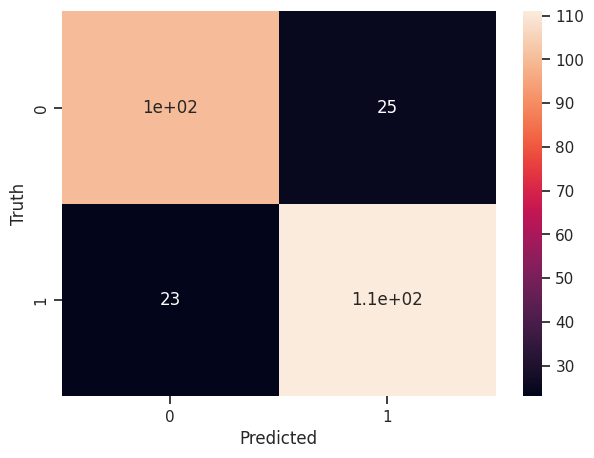

In [40]:
# visualisasi confusion matrix
cm = confusion_matrix(yTest, prediksi_DT)

plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

### Feature Importance

In [59]:
def DT_feature_importance(x_train,y_train):
  # get the importance of the resulting features.
  importances = DT.feature_importances_

  # create a data frame for visualization.
  final_df = pd.DataFrame({"Features": x_train.columns, "Importances":importances})
  final_df.set_index('Importances')

  # sort in descending order
  final_df = final_df.sort_values('Importances',ascending=False)

  #visualising feature importance
  pd.Series(DT.feature_importances_, index=x_train.columns).nlargest(10).plot(kind='barh', title='Decison Tree Feature Importance')
  return final_df

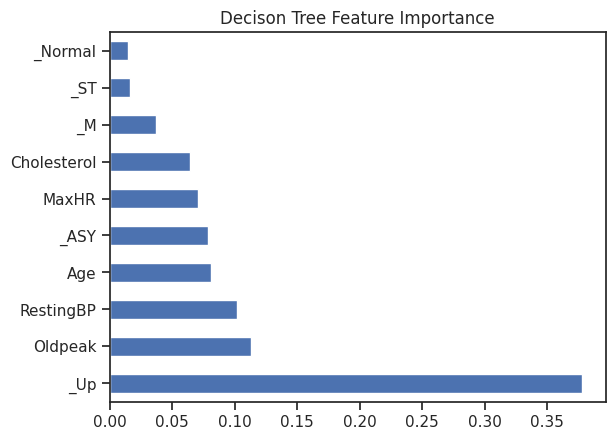

In [60]:
feature_importance = DT_feature_importance(xTrain, yTrain)

### Cross Validation

In [36]:
mulai = time.time()
scores_dt = cross_val_score(DT, predictor, target, cv=10) # perhatikan sekarang kita menggunakan seluruh data
waktu = time.time() - mulai
print("Accuracy Decision Tree: %0.2f (+/- %0.2f), Waktu = %0.3f detik" % (scores_dt.mean(), scores_dt.std() * 2, waktu))

Accuracy Decision Tree: 0.78 (+/- 0.12), Waktu = 0.204 detik


## Perbandingan Model
sebelum optimisasi parameter

Regresi Logistik    0.709302
Decision Tree       0.697674
dtype: float64

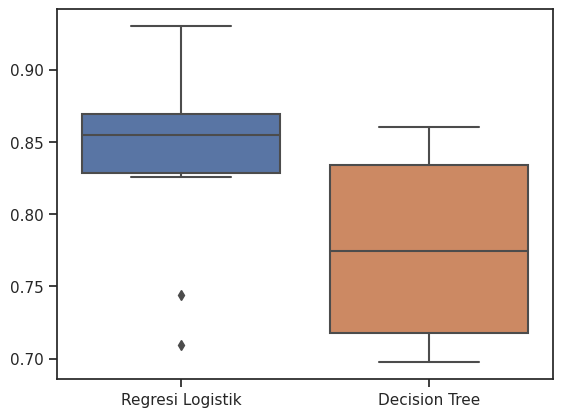

In [41]:
# Visualisasi untuk mengevaluasi & membandingkan model dengan lebih baik lagi
df_ = pd.DataFrame({'Regresi Logistik': scores_regLog, "Decision Tree":scores_dt})
p = sns.boxplot(data = df_)
df_.min()

## Hyperparameter Optimization

In [42]:
# Optimal parameter Desion Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

param_grid = { 'criterion':['gini','entropy'],'max_depth': np.arange(3, 15)}
dtree_model=DecisionTreeClassifier()
dtree_gscv = RandomizedSearchCV(dtree_model, param_grid, cv=10)
dtree_gscv.fit(xTrain, yTrain)

print(dtree_gscv.best_score_)
print(dtree_gscv.best_params_)

0.8387704918032787
{'max_depth': 3, 'criterion': 'entropy'}


In [43]:
# Optimal parameter Regresi Logistik
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

parameters = [{'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']},
              {'penalty':['none', 'elasticnet', 'l1', 'l2']},
              {'C':[0.001, 0.01, 0.1, 1, 10, 100]},
             {'class_weight':[None, 'balanced']}]

grid_search = GridSearchCV(estimator = LogisticRegression(),
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=1)
grid_search.fit(xTrain, yTrain)

print(grid_search.best_score_)
print(grid_search.best_params_)

Fitting 5 folds for each of 17 candidates, totalling 85 fits
0.8505096418732782
{'C': 100}


## Perbandingan Model
setelah optimisasi variabel

Accuracy Regresi Logistik: 0.84 (+/- 0.13)
Accuracy Decision Tree: 0.82 (+/- 0.10)


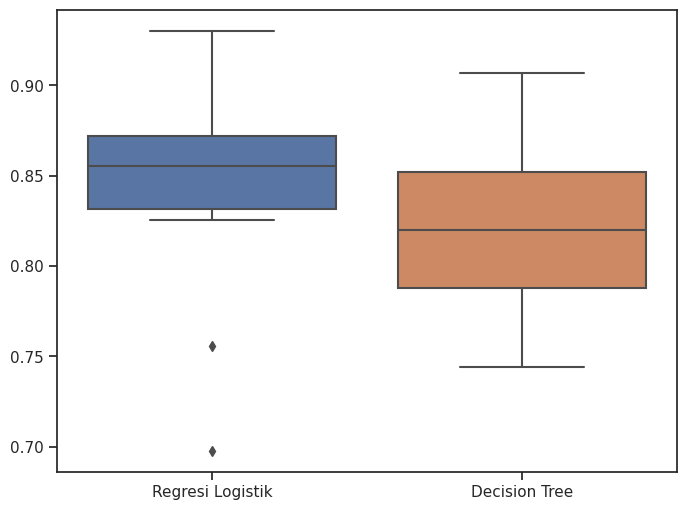

In [44]:
kCV = 10
# Menggunakan parameter optimal
RL_opt = LogisticRegression(C=100)
DT_opt = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

# Melakukan Cross Validasi
models = ['Regresi Logistik', 'Decision Tree']
RL_score = cross_val_score(RL_opt, predictor, target, cv=kCV, scoring='accuracy', n_jobs=-2, verbose=0)
DT_score = cross_val_score(DT_opt, predictor, target, cv=kCV, scoring='accuracy', n_jobs=-2, verbose=0)
scores = [RL_score, DT_score]

data = {m:s for m,s in zip(models, scores)}
for name in data.keys():
  print("Accuracy %s: %0.2f (+/- %0.2f)" % (name, data[name].mean(), data[name].std() * 2))

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
p = sns.boxplot(data=pd.DataFrame(data), ax=ax)

- mengalami kenaikan yang cukup signifikan